# 13. Comparing Baseline and Post-Treatment Scores - Hodgkins - CI
Hodgkin’s disease is a cancer that typically affects young people. The disease is curable but the treatment can be very harsh. The purpose of the trial was to come up with dosage that would cure the cancer but minimize the adverse effects on the patients.

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load the data
hodgkins = pd.read_csv('hodgkins.csv')
hodgkins.head()

,height,rad,chemo,base,month15
0,164,679,180,160.57,87.77
1,168,311,180,98.24,67.62
2,173,388,239,129.04,133.33
3,157,370,168,85.41,81.28
4,160,468,151,67.94,79.26


This table hodgkins contains data on the effect that the treatment had on the lungs of 22 patients. The columns are:

- Height in cm

- A measure of radiation to the mantle (neck, chest, under arms)

- A measure of chemotherapy

- A score of the health of the lungs at baseline, that is, at the start of the treatment; higher scores correspond to more healthy lungs

- The same score of the health of the lungs, 15 months after treatment

We will compare the baseline and 15-month scores. As each row corresponds to one patient, we say that the sample of baseline scores and the sample of 15-month scores are paired - they are not just two sets of 22 values each, but 22 pairs of values, one for each patient.

At a glance, the 15-month scores tend to be lower than the baseline scores – the sampled patients’ lungs seem to be doing worse 15 months after the treatment. 

,height,rad,chemo,base,month15,drop
0,164,679,180,160.57,87.77,72.80
1,168,311,180,98.24,67.62,30.62
2,173,388,239,129.04,133.33,-4.29
3,157,370,168,85.41,81.28,4.13
4,160,468,151,67.94,79.26,-11.32


28.615909090909096


<Axes: xlabel='drop', ylabel='Count'>

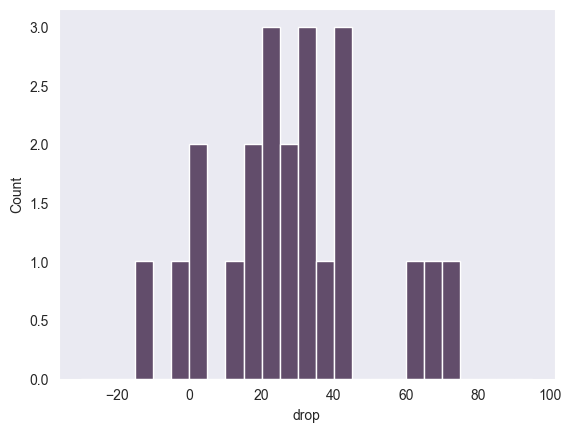

In [2]:
hodgkins['drop'] = hodgkins['base'] - hodgkins['month15']
display(hodgkins.head())

print(hodgkins['drop'].mean())

sns.set_style('dark')
sns.set_palette('rocket')
sns.histplot(hodgkins['drop'],
    bins=np.arange(-30, 100, 5))

In the sample, the average drop is about 28.6. But could this be the result of chance variation? The data are from a random sample. Could it be that in the entire population of patients, the average drop is just 0?

To answer this, we can set up two hypotheses:

**Null hypothesis**: In the population, the average drop is 0.

**Alternative hypothesis**: In the population, the average drop is not 0.

To test this hypothesis with a 1% cutoff for the p-value, let’s construct an approximate 99% confidence interval for the average drop in the population.

In [3]:
# test to see if my shuffling/nootstrapping works
resample = hodgkins.sample(frac=1)
resample.head()
# by default replace = True for sample()

,height,rad,chemo,base,month15,drop
11,181,539,196,129.75,90.78,38.97
6,163,453,134,129.88,69.24,60.64
0,164,679,180,160.57,87.77,72.80
1,168,311,180,98.24,67.62,30.62
9,178,479,216,92.24,73.43,18.81


,Repetition,Average drop
0,1,27.442273
1,2,34.699545
2,3,32.455455
3,4,23.942727
4,5,31.602273


99% confidence intervals: [20.588563636363634, 40.14518409090909]


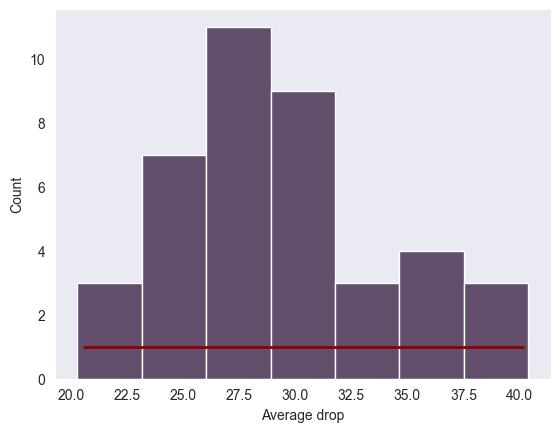

In [4]:
def bootstrap():
    data = []
    for i in range(1, rep + 1):
        resample = hodgkins.sample(frac=1, replace = True).reset_index(drop=True)
        avg_drop = resample['drop'].mean()
        data.append({
            'Repetition': i,
            'Average drop': avg_drop 
        })
    datadf = pd.DataFrame(data)
    return datadf

rep = int(input("Number of repetitions:"))
datadf = bootstrap()
display(datadf.head())

# Computing 99% CIs
left = np.percentile(datadf['Average drop'], 0.5)
right = np.percentile(datadf['Average drop'], 99.5)
print(f"99% confidence intervals: [{left}, {right}]")

# Plot
sns.histplot(datadf, x = 'Average drop')

ax = plt.gca()
ax.plot([left, right], [1, 1], color='darkred', lw=2)